In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df=pd.read_csv('Algerian_cleaned.csv')

In [4]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [5]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [6]:
df.drop(['day','month','year'],axis=1,inplace=True)

In [7]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [8]:
df['Classes'].value_counts()

Classes
fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: count, dtype: int64

In [9]:
df['Classes']=np.where(df['Classes'].str.contains('not fire'),0,1)

In [11]:
df.tail()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
238,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1,1
239,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,0,1
240,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,0,1
241,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0,1
242,24,64,15,0.2,67.3,3.8,16.5,1.2,4.8,0.5,0,1


In [12]:
X=df.drop('FWI',axis=1)
y=df['FWI']

In [13]:
X.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0,0


In [14]:
#Train Test Split
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)

In [15]:
X_train.shape,X_test.shape

((194, 11), (49, 11))

In [16]:
X_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.653725,-0.308149,-0.313112,0.690285,0.468911,0.372163,0.613138,0.446280,0.539642,0.258344
RH,-0.653725,1.000000,0.211645,0.239441,-0.649239,-0.401836,-0.220945,-0.714640,-0.346511,-0.454926,-0.408441
Ws,-0.308149,0.211645,1.000000,0.235922,-0.176596,0.004712,0.092866,-0.002300,0.037465,-0.075322,-0.202357
Rain,-0.313112,0.239441,0.235922,1.000000,-0.547864,-0.288538,-0.301110,-0.349903,-0.299179,-0.378585,-0.057382
FFMC,0.690285,-0.649239,-0.176596,-0.547864,1.000000,0.611978,0.519513,0.751819,0.598248,0.786012,0.254770
DMC,0.468911,-0.401836,0.004712,-0.288538,0.611978,1.000000,0.876122,0.679049,0.983891,0.606775,0.188980
DC,0.372163,-0.220945,0.092866,-0.301110,0.519513,0.876122,1.000000,0.512934,0.946181,0.538893,-0.083038
ISI,0.613138,-0.714640,-0.002300,-0.349903,0.751819,0.679049,0.512934,1.000000,0.637669,0.740072,0.291889
BUI,0.446280,-0.346511,0.037465,-0.299179,0.598248,0.983891,0.946181,0.637669,1.000000,0.602102,0.090326
Classes,0.539642,-0.454926,-0.075322,-0.378585,0.786012,0.606775,0.538893,0.740072,0.602102,1.000000,0.196276


In [22]:
def correlation(dataset,thresold):
    col_corr=set()
    corr_matrix=dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range (i):
            if abs(corr_matrix.iloc[i,j])>thresold:
                colname=corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr            

In [23]:
corr_features=correlation(X_train,0.85)

In [24]:
corr_features

{'BUI', 'DC'}

In [25]:
X_train.drop(corr_features,axis=1,inplace=True)
X_test.drop(corr_features,axis=1,inplace=True)
X_train.shape,X_test.shape

((194, 9), (49, 9))

Feature Scaling or Standardization

In [26]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

Box Plot To Understand the effect of Standard Scaler

Text(0.5, 1.0, 'X_train after Scaling')

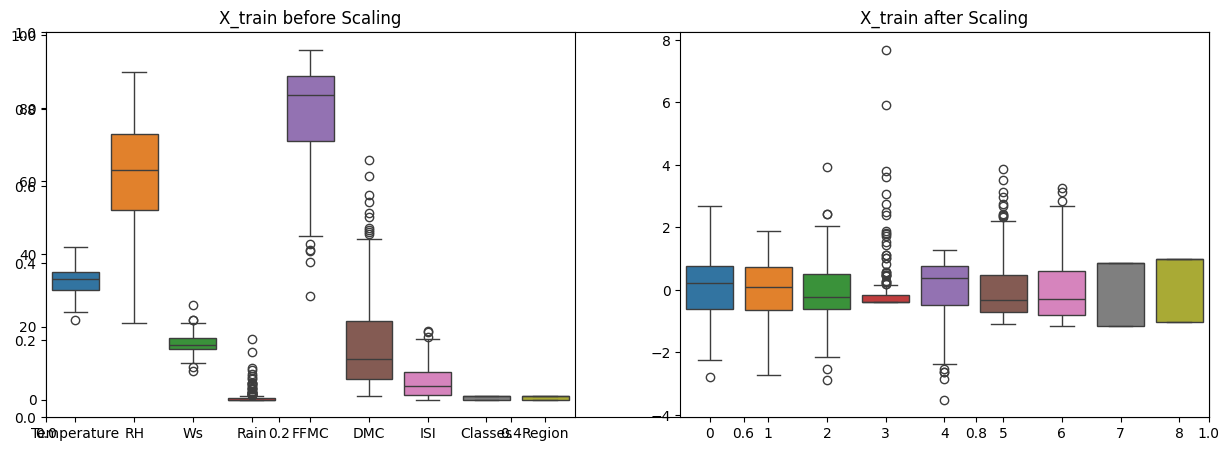

In [28]:
plt.subplots(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(data=X_train)
plt.title("X_train before Scaling")
plt.subplot(1,2,2)
sns.boxplot(data=X_train_scaled)
plt.title("X_train after Scaling")

Linear Regression Modelling

Mean Absolute Error  0.5049978694165663
R2  0.9805895859259883


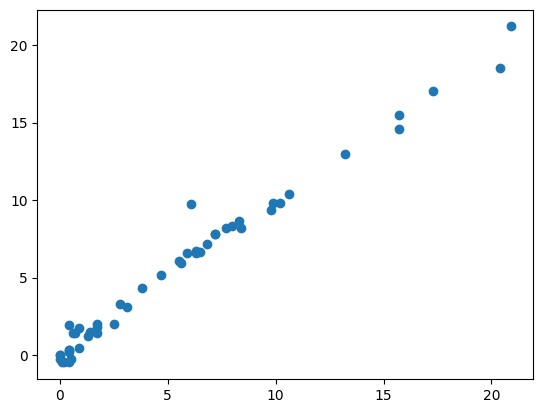

In [29]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

lin=LinearRegression()
lin.fit(X_train_scaled,y_train)
y_pred=lin.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)

print("Mean Absolute Error ",mae)
print("R2 ",score)
plt.scatter(y_test,y_pred)

Lasso Regression

Mean Absolute Error  1.0093958923873407
R2  0.9430507350726562


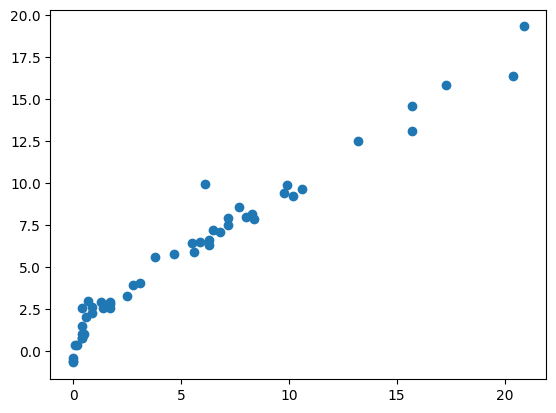

In [30]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
lasso=Lasso()
lasso.fit(X_train_scaled,y_train)
y_pred=lasso.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)

print("Mean Absolute Error ",mae)
print("R2 ",score)
plt.scatter(y_test,y_pred)

Cross Validation Lasso

In [32]:
from sklearn.linear_model import LassoCV
lassocv=LassoCV()
lassocv.fit(X_train_scaled,y_train)

LassoCV()

In [33]:
lassocv.alpha_

0.04391080246587261

In [34]:
lassocv.alphas_

array([7.1563667 , 6.67405153, 6.2242428 , 5.80474966, 5.41352896,
       5.04867523, 4.70841142, 4.39108025, 4.09513613, 3.81913766,
       3.56174057, 3.32169117, 3.09782031, 2.88903759, 2.69432612,
       2.51273756, 2.34338746, 2.18545099, 2.0381589 , 1.90079382,
       1.77268667, 1.65321353, 1.54179247, 1.43788081, 1.34097246,
       1.2505954 , 1.16630946, 1.08770411, 1.01439649, 0.94602956,
       0.88227033, 0.82280827, 0.76735374, 0.71563667, 0.66740515,
       0.62242428, 0.58047497, 0.5413529 , 0.50486752, 0.47084114,
       0.43910802, 0.40951361, 0.38191377, 0.35617406, 0.33216912,
       0.30978203, 0.28890376, 0.26943261, 0.25127376, 0.23433875,
       0.2185451 , 0.20381589, 0.19007938, 0.17726867, 0.16532135,
       0.15417925, 0.14378808, 0.13409725, 0.12505954, 0.11663095,
       0.10877041, 0.10143965, 0.09460296, 0.08822703, 0.08228083,
       0.07673537, 0.07156367, 0.06674052, 0.06224243, 0.0580475 ,
       0.05413529, 0.05048675, 0.04708411, 0.0439108 , 0.04095

0.5556715031617872
0.978328234520343


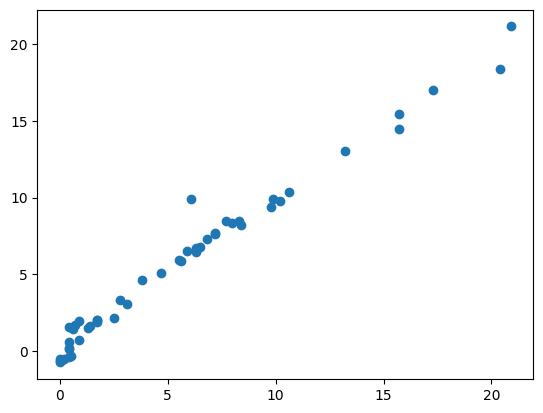

In [36]:
y_pred=lassocv.predict(X_test_scaled)
plt.scatter(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)

print(mae)
print(score)


Ridge Regression Model

0.5192048325844728
0.9801058063273602


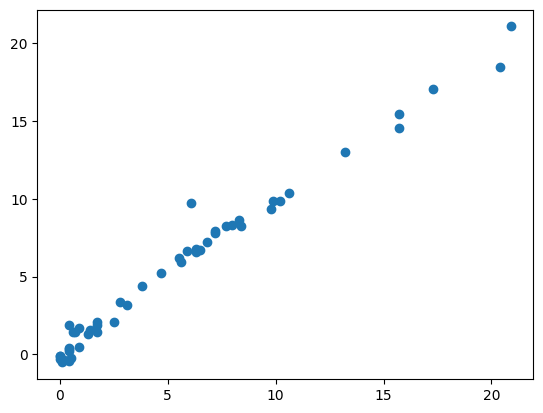

In [37]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

ridge=Ridge()
ridge.fit(X_train_scaled,y_train)
y_pred=ridge.predict(X_test_scaled)
plt.scatter(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print(mae)
print(score)

Ridge Cross Validation

0.5192048325836316
0.9801058063273654


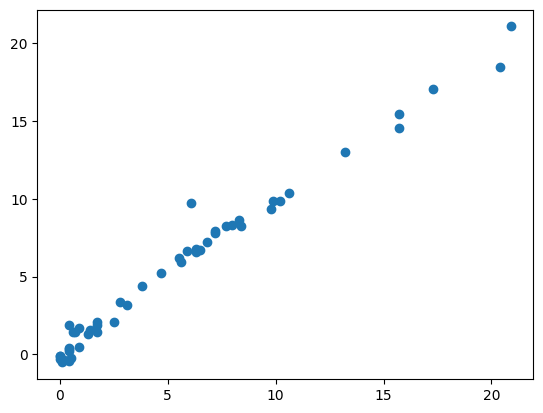

In [38]:
from sklearn.linear_model import RidgeCV
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

ridgecv=RidgeCV()
ridgecv.fit(X_train_scaled,y_train)
y_pred=ridgecv.predict(X_test_scaled)
plt.scatter(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print(mae)
print(score)

ElasticNet

1.6834416340136709
0.8676961352267807


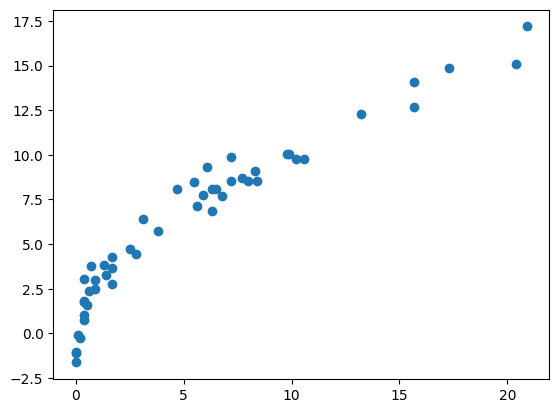

In [39]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

en=ElasticNet()
en.fit(X_train_scaled,y_train)
y_pred=en.predict(X_test_scaled)
plt.scatter(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print(mae)
print(score)

0.5710147088777218
0.9781014571778188


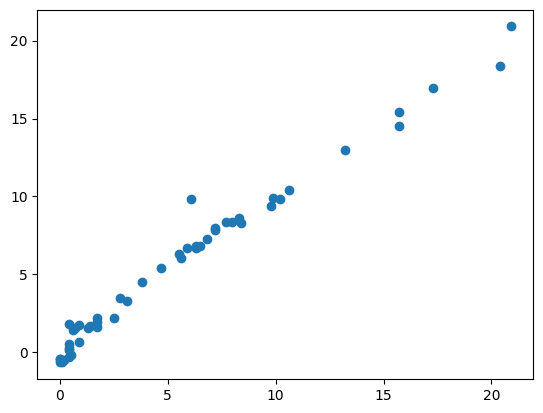

In [40]:
from sklearn.linear_model import ElasticNetCV
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

en=ElasticNetCV()
en.fit(X_train_scaled,y_train)
y_pred=en.predict(X_test_scaled)
plt.scatter(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print(mae)
print(score)

Pickle the ML models along with Preprocessing model

In [41]:
scaler

StandardScaler()

In [42]:
ridge

Ridge()

In [43]:
import pickle 
pickle.dump(scaler,open('scaler.pkl','wb'))
pickle.dump(ridge,open('ridge.pkl','wb'))
